In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf
start = '2010-01-01'
end = '2024-09-29'

df = yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700
2024-09-27,228.460007,229.520004,227.300003,227.789993,227.789993,34026000


In [4]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


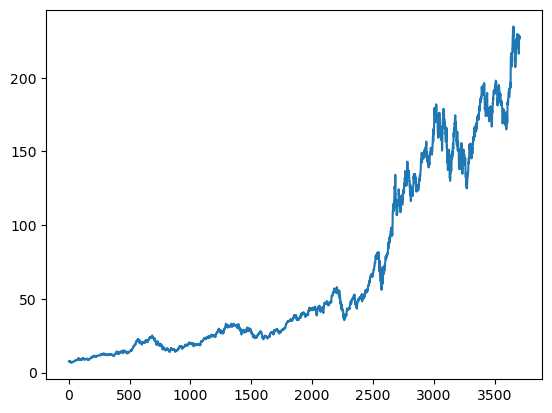

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3704,227.339996,229.449997,225.809998,226.470001,54146000
3705,228.649994,229.350006,225.729996,227.369995,43556100
3706,224.929993,227.289993,224.020004,226.369995,42308700
3707,227.300003,228.500000,225.410004,227.520004,36636700


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3704    211.6761
3705    212.2568
3706    212.7902
3707    213.2316
3708    213.6924
Name: Close, Length: 3709, dtype: float64

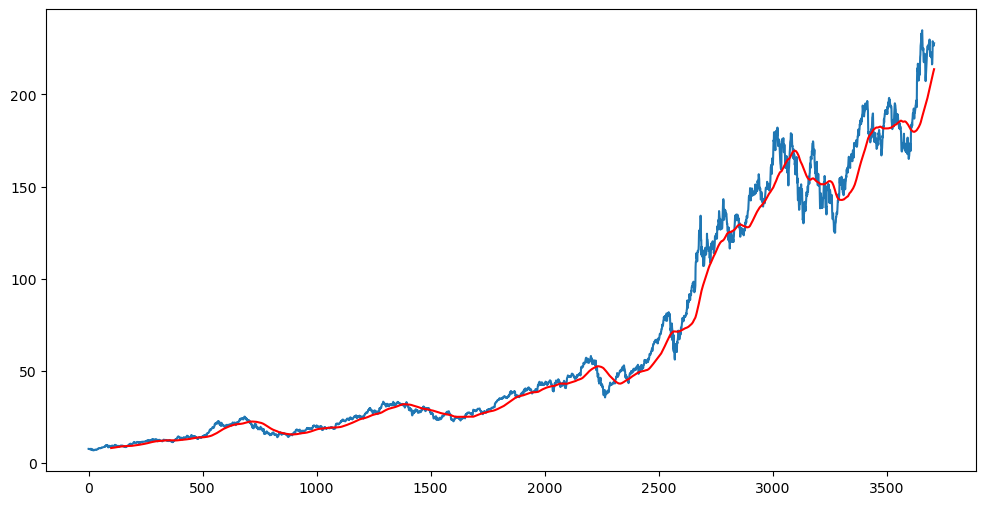

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3704    196.51320
3705    196.68845
3706    196.84895
3707    197.00800
3708    197.18105
Name: Close, Length: 3709, dtype: float64

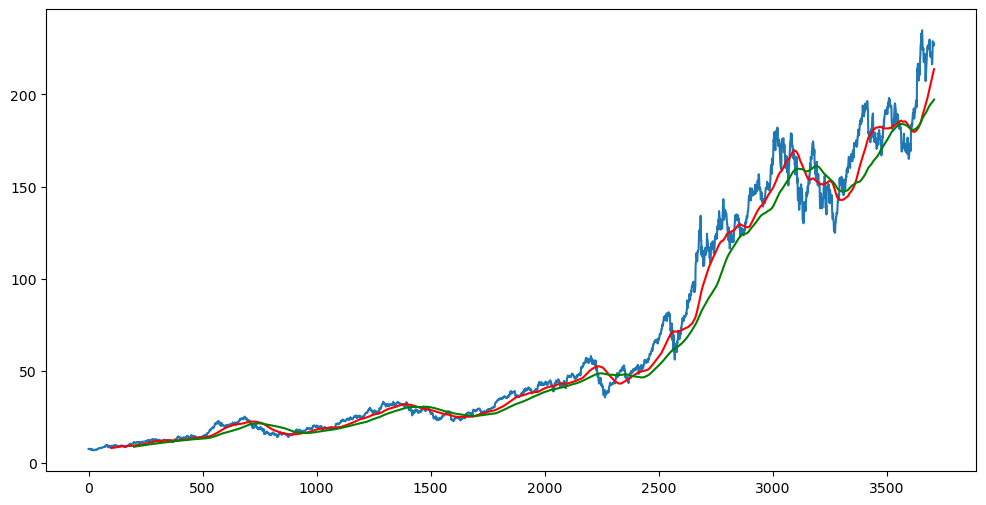

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3709, 5)

In [13]:
#spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2596, 1)
(1113, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2596,69.644997
2597,71.932503
2598,73.449997
2599,72.267502
2600,73.290001


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.82596322],
       [0.8524507 ],
       [0.85311793]])

In [18]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [19]:
data_training_array.shape

(2596, 1)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape =(x_train.shape[1],1) ))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu',return_sequences = True ))
model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation = 'relu',return_sequences = True, ))
model.add(Dropout(0.3))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

In [23]:
x_train.shape

(2496, 100, 1)

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 36s 278ms/step - loss: 0.0500
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - loss: 0.0049
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - loss: 0.0036
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - loss: 0.0037
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - loss: 0.0039
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - loss: 0.0033
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - loss: 0.0031
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - loss: 0.0027
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - loss: 0.0026
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - loss: 0.0024
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - loss: 0.0023
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - loss: 0.0020
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 256ms/step - loss: 0.0021
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - loss: 0.0021
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [26]:
model.save('keras_model.keras')

In [27]:
data_testing.head()

,Close
2596,69.644997
2597,71.932503
2598,73.449997
2599,72.267502
2600,73.290001


In [28]:
data_training.tail(100)

,Close
2496,64.862503
2497,65.434998
2498,66.394997
2499,67.677498
2500,66.730003
...,...
2591,67.092499
2592,69.025002
2593,68.757500
2594,70.742500


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [31]:
final_df.head()

,Close
0,64.862503
1,65.434998
2,66.394997
3,67.677498
4,66.730003


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04906914],
       [0.0522723 ],
       [0.0576436 ],
       ...,
       [0.95272126],
       [0.95915568],
       [0.9606663 ]])

In [33]:
input_data.shape

(1213, 1)

In [34]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [35]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1113, 100, 1)
(1113,)


In [36]:
#making predictions

y_predicted = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step


In [37]:
y_predicted.shape

(1113, 1)

In [38]:
print(y_test)

[0.07582771 0.08862656 0.0971171  ... 0.95272126 0.95915568 0.9606663 ]


In [39]:
y_predicted

array([[0.10679767],
       [0.10800493],
       [0.10919917],
       ...,
       [0.81161726],
       [0.82510793],
       [0.8412436 ]], dtype=float32)

In [40]:
scaler.scale_

array([0.00559511])

In [41]:
scale_factor=1/0.00559511
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

[ 13.55249691  15.84000285  17.35749695 ... 170.27748436 171.42749344
 171.69748243]
[ 19.087679  19.30345   19.516893 ... 145.05832  147.46947  150.35336 ]


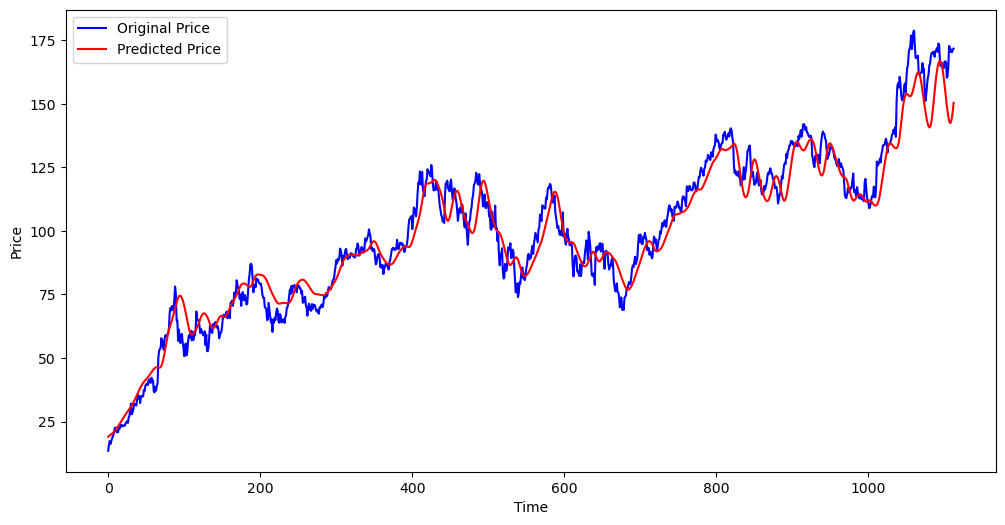

In [42]:
plt.figure(figsize=(12,6))
y_test=y_test.flatten()
y_predicted=y_predicted.flatten()
min_length= min(len(y_test),len(y_predicted))
print(y_test[:min_length])
print(y_predicted[:min_length])

plt.plot(y_test[:min_length],'b', label = 'Original Price')
plt.plot(y_predicted[:min_length],'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()